# Lab 05: Sign Classification with NBC

## Datasets

In [515]:
from PIL import Image
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics, datasets
from sklearn.naive_bayes import GaussianNB

### SciKitLearn Digits Dataset

In [516]:
digits = datasets.load_digits()
digits_data = digits.data
digits_split = int(len(digits_data)*0.7)
digits_x_training = digits_data[:digits_split]
digits_x_testing = digits_data[digits_split:]
digits_target = digits.target
digits_y_training = digits_target[:digits_split]
digits_y_testing = digits_target[digits_split:]
print('Training data:', len(digits_x_training), '\nTraining Labels:', len(digits_y_training), '\nTesting Data:', 
      len(digits_x_testing), '\nTesting Labels:', len(digits_y_testing), '\nCheck:', 
      len(digits_data) == len(digits_x_training) + len(digits_x_testing))
print(digits_x_training.shape)
print(digits_y_training.shape)

Training data: 1257 
Training Labels: 1257 
Testing Data: 540 
Testing Labels: 540 
Check: True
(1257, 64)
(1257,)


### SciKitLearn Digits Dataset Summarized

In [517]:
digits_summarized = []
for d in digits_data:
    row =[]
    for n in d:
        if n < 5:
            row.append(0)
        elif n > 10:
            row.append(2)
        else:
            row.append(1)
    digits_summarized.append(row)
digits_summarized = np.stack(digits_summarized)
digits_summ_x_training = digits_summarized[:digits_split]
digits_summ_x_testing = digits_summarized[digits_split:]
print('Training data:', len(digits_summ_x_training), '\nTesting Data:', 
      len(digits_summ_x_testing))

Training data: 1257 
Testing Data: 540


### MNIST Light

Training Data: 3500 
Testing Data: 1500 
Training Labels: 3500 
Testing Labels: 1500 
Check: True
(3500, 400)
(3500,)


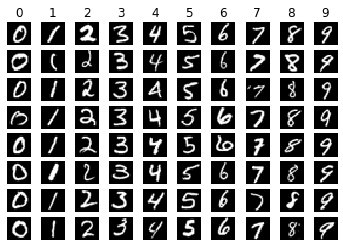

In [518]:
import MNIST
mnist = MNIST.MNISTData('MNIST_Light/*/*.png')
train_features, test_features, train_labels, test_labels = mnist.get_data()
print('Training Data:', len(train_features),'\nTesting Data:', len(test_features), '\nTraining Labels:', 
      len(train_labels), '\nTesting Labels:', len(test_labels), '\nCheck:', 
      int(len(train_features)) == int((len(test_features) + len(train_features))*0.7))
print(train_features.shape)
print(train_labels.shape)
mnist.visualize_random()

## Classifiers

### Gaussian NB Classifier (SciKitLearn)

#### Digits Dataset

In [519]:
gnb_digits = GaussianNB()
gnb_digits.fit(digits_x_training, digits_y_training)
y_pred_gnb_digits = gnb_digits.predict(digits_x_testing)

In [520]:
print("Classification report SKLearn GNB:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_gnb_digits)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_gnb_digits))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.65      0.79      0.71        53
           2       0.98      0.81      0.89        53
           3       0.92      0.64      0.76        53
           4       1.00      0.86      0.92        57
           5       0.83      0.93      0.87        56
           6       0.96      0.98      0.97        54
           7       0.73      0.83      0.78        54
           8       0.59      0.71      0.64        52
           9       0.82      0.73      0.77        55

    accuracy                           0.83       540
   macro avg       0.84      0.82      0.83       540
weighted avg       0.84      0.83      0.83       540


Confusion matrix SKLearn GNB:
[[51  0  0  0  0  0  0  0  2  0]
 [ 0 42  1  0  0  0  0  0  3  7]
 [ 0  5 43  1  0  0  1  0  1  2]
 [ 0  3  0 34  0  3  0  2 11  0]
 [ 1  0  0  0 49  0  0  6  1  0]
 [ 0  2  0

#### Summarized Digits Dataset

In [521]:
gnb_digits_summ = GaussianNB()
gnb_digits_summ.fit(digits_summ_x_training, digits_y_training)
y_pred_gnb_digits_summ = gnb_digits_summ.predict(digits_summ_x_testing)

In [522]:
print("Classification report SKLearn GNB:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_gnb_digits_summ)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_gnb_digits_summ))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.86      0.34      0.49        53
           2       0.97      0.62      0.76        53
           3       1.00      0.19      0.32        53
           4       0.95      0.91      0.93        57
           5       0.94      0.57      0.71        56
           6       0.96      0.96      0.96        54
           7       0.82      0.85      0.84        54
           8       0.31      0.92      0.46        52
           9       0.63      0.78      0.70        55

    accuracy                           0.71       540
   macro avg       0.84      0.71      0.71       540
weighted avg       0.84      0.71      0.71       540


Confusion matrix SKLearn GNB:
[[50  0  0  0  1  0  0  0  2  0]
 [ 0 18  0  0  0  0  0  1 22 12]
 [ 1  0 33  0  0  0  0  0 18  1]
 [ 0  1  0 10  0  0  0  1 34  7]
 [ 0  0  0  0 52  0  1  1  3  0]
 [ 1  2  1

#### MNIST Light Dataset

In [523]:
gnb_mnist = GaussianNB()
gnb_mnist.fit(train_features, train_labels)
y_pred_gnb_mnist = gnb_mnist.predict(test_features)

In [524]:
print("Classification report SKLearn GNB:\n%s\n" % (metrics.classification_report(test_labels, y_pred_gnb_mnist)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred_gnb_mnist))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69       164
           1       0.71      0.94      0.81       152
           2       0.83      0.50      0.62       155
           3       0.83      0.53      0.65       154
           4       0.75      0.31      0.44       143
           5       0.67      0.16      0.25       141
           6       0.81      0.85      0.83       143
           7       0.83      0.82      0.83       158
           8       0.41      0.64      0.50       132
           9       0.60      0.84      0.70       158

    accuracy                           0.66      1500
   macro avg       0.70      0.65      0.63      1500
weighted avg       0.70      0.66      0.64      1500


Confusion matrix SKLearn GNB:
[[154   0   6   0   1   1   0   0   1   1]
 [  1 143   1   0   0   1   0   1   3   2]
 [ 11   6  77  10   2   1  19   1  27   1]
 [ 32  11   5  82   0   0   2   3  12   7]
 [ 

### Nearest Centroid Classifier (NCC)

#### Fit function

In [525]:
def NCC_fit(X, Y):
        classes = set(Y)
        class_count = {k: 0.0 for k in classes}
        classes_dict = {k: np.zeros(len(X[0])) for k in classes}
        for i in range(len(X)):
            for j in range(len(X[i])):
                classes_dict[Y[i]][j] += X[i][j]
            class_count[Y[i]] += 1
        ncc = []
        for k in classes_dict:
            ncc.append(classes_dict[k]/class_count[k])
        return np.array(ncc)

#### Predict function

In [526]:
def NCC_predict(centroids, X):
    prediction = []
    for x in X:
        temp = []
        for means in centroids:
            distance = np.linalg.norm(np.subtract(means,x))
            temp.append(distance)
        prediction.append(np.argmin(temp, axis=0))
    return prediction

#### Digits Dataset

In [527]:
ncc_fit_digits = NCC_fit(digits_x_training, digits_y_training)
y_pred_ncc_digits = NCC_predict(ncc_fit_digits, digits_x_testing)

In [528]:
print("Classification report NCC:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_ncc_digits)))
print("Confusion matrix NCC:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_ncc_digits))

Classification report NCC:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.89      0.75      0.82        53
           2       0.98      0.85      0.91        53
           3       0.84      0.77      0.80        53
           4       0.98      0.93      0.95        57
           5       0.86      0.89      0.88        56
           6       0.98      0.96      0.97        54
           7       0.90      0.96      0.93        54
           8       0.80      0.75      0.77        52
           9       0.65      0.87      0.74        55

    accuracy                           0.87       540
   macro avg       0.88      0.87      0.88       540
weighted avg       0.88      0.87      0.88       540


Confusion matrix NCC:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 40  0  0  0  1  0  0  0 12]
 [ 1  0 45  6  0  0  0  0  0  1]
 [ 0  1  0 41  0  2  0  3  5  1]
 [ 1  0  0  0 53  0  0  0  3  0]
 [ 0  0  0  0  0 50  1  0 

#### Summarized Digits Dataset

In [529]:
ncc_fit_digits_summ = NCC_fit(digits_summ_x_training, digits_y_training)
y_pred_ncc_digits_summ = NCC_predict(ncc_fit_digits_summ, digits_summ_x_testing)

In [530]:
print("Classification report NCC:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_ncc_digits_summ)))
print("Confusion matrix NCC:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_ncc_digits_summ))

Classification report NCC:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.81      0.66      0.73        53
           2       0.96      0.81      0.88        53
           3       0.76      0.77      0.77        53
           4       0.96      0.93      0.95        57
           5       0.88      0.89      0.88        56
           6       0.96      0.94      0.95        54
           7       0.88      0.94      0.91        54
           8       0.76      0.79      0.77        52
           9       0.66      0.82      0.73        55

    accuracy                           0.85       540
   macro avg       0.86      0.85      0.85       540
weighted avg       0.86      0.85      0.85       540


Confusion matrix NCC:
[[51  0  0  0  1  1  0  0  0  0]
 [ 0 35  0  1  0  1  0  0  4 12]
 [ 1  1 43  7  0  0  0  0  0  1]
 [ 0  2  1 41  0  2  0  3  4  0]
 [ 1  0  0  0 53  0  0  0  3  0]
 [ 0  0  0  0  0 50  2  0 

#### MNIST Light Dataset

In [531]:
ncc_fit_mnist = NCC_fit(train_features, train_labels)
y_pred_ncc_mnist = NCC_predict(ncc_fit_mnist, test_features)

In [532]:
print("Classification report NCC:\n%s\n" % (metrics.classification_report(test_labels, y_pred_ncc_mnist)))
print("Confusion matrix NCC:\n%s" % metrics.confusion_matrix(test_labels, y_pred_ncc_mnist))

Classification report NCC:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       164
           1       0.71      0.97      0.82       152
           2       0.84      0.73      0.78       155
           3       0.74      0.76      0.75       154
           4       0.75      0.76      0.75       143
           5       0.72      0.69      0.70       141
           6       0.90      0.86      0.88       143
           7       0.95      0.80      0.87       158
           8       0.79      0.72      0.75       132
           9       0.76      0.80      0.78       158

    accuracy                           0.80      1500
   macro avg       0.81      0.80      0.80      1500
weighted avg       0.81      0.80      0.80      1500


Confusion matrix NCC:
[[150   0   2   0   0   6   3   1   2   0]
 [  0 148   0   0   0   2   0   0   2   0]
 [  0  15 113   8   2   3   3   1   8   2]
 [  1   5   8 117   1   7   1   2   8   4]
 [  1   4   2   0 1

### NB Classifier

#### Fit Function

In [533]:
def NBC_fit(X, Y):
    class_probabilities = dict()
    features_per_class = dict()
    for i in range(len(X)):
        class_ = Y[i]
        pixels = X[i]
        if class_ not in features_per_class:
            features_per_class[class_] = list()
        features_per_class[class_].append(pixels)
    for class_ in features_per_class:
        class_probabilities[class_] = Y.tolist().count(class_)/len(Y)
    return class_probabilities, features_per_class

def count_value(col, val):
    count = 0.0
    for v in col:
        if v == val:
            count += 1
    return count

#### Predict Function

In [534]:
def NBC_predict(X_train, X_test, class_probabilities, features_per_class):
    prediction = list()
    for x in X_train:
        probabilities = np.zeros(len(features_per_class))
        for class_ in features_per_class:
            temp = list()
            features_in_class = np.stack(features_per_class[class_])
            for i in range(len(x)):
                count_value_total = count_value(X_test[:,i], x[i])
                count_value_per_class = count_value(features_in_class[:,i], x[i])
                if count_value_total == 0:
                    temp.append(0.0)
                else:
                    temp.append(count_value_per_class/count_value_total)
            probabilities[class_] = np.prod(temp)*class_probabilities[class_]
        prediction.append(np.argmax(probabilities, axis=0))
    return prediction

#### Digits Dataset

In [535]:
class_probabilities_digits, features_per_class_digits = NBC_fit(digits_x_training, digits_y_training)
y_pred_nbc_digits = NBC_predict(digits_x_testing, digits_x_training, class_probabilities_digits,
                                features_per_class_digits)

In [536]:
print("Classification report NBC:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_nbc_digits)))
print("Confusion matrix NBC:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_nbc_digits))

Classification report NBC:
              precision    recall  f1-score   support

           0       0.24      1.00      0.39        53
           1       0.82      0.51      0.63        53
           2       1.00      0.36      0.53        53
           3       1.00      0.58      0.74        53
           4       0.97      0.65      0.78        57
           5       0.88      0.52      0.65        56
           6       1.00      0.65      0.79        54
           7       0.84      0.59      0.70        54
           8       0.71      0.62      0.66        52
           9       0.73      0.65      0.69        55

    accuracy                           0.61       540
   macro avg       0.82      0.61      0.65       540
weighted avg       0.82      0.61      0.66       540


Confusion matrix NBC:
[[53  0  0  0  0  0  0  0  0  0]
 [20 27  0  0  1  0  0  0  3  2]
 [28  0 19  0  0  0  0  0  5  1]
 [13  0  0 31  0  3  0  1  3  2]
 [20  0  0  0 37  0  0  0  0  0]
 [19  2  0  0  0 29  0  1 

#### Summarized Digits Dataset

In [537]:
class_probabilities_digits_summ, features_per_class_digits_summ = NBC_fit(digits_summ_x_training, digits_y_training)
y_pred_nbc_digits_summ = NBC_predict(digits_summ_x_testing, digits_summ_x_training, class_probabilities_digits_summ, 
                                     features_per_class_digits_summ)

In [538]:
print("Classification report NBC:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_nbc_digits_summ)))
print("Confusion matrix NBC:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_nbc_digits_summ))

Classification report NBC:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        53
           1       0.72      0.74      0.73        53
           2       0.94      0.87      0.90        53
           3       0.75      0.79      0.77        53
           4       0.94      0.89      0.92        57
           5       0.80      0.88      0.84        56
           6       0.98      0.89      0.93        54
           7       0.82      0.83      0.83        54
           8       0.77      0.63      0.69        52
           9       0.64      0.78      0.70        55

    accuracy                           0.81       540
   macro avg       0.82      0.81      0.81       540
weighted avg       0.82      0.81      0.81       540


Confusion matrix NBC:
[[43  0  1  0  3  4  0  0  2  0]
 [ 0 39  0  0  0  1  0  0  0 13]
 [ 1  0 46  5  0  0  0  0  0  1]
 [ 0  3  1 42  0  2  0  3  1  1]
 [ 1  0  0  0 51  0  0  3  2  0]
 [ 1  1  0  1  0 49  1  0 

### Own Gaussian NB Classifier

#### Fit Function

In [539]:
def prob_function(x, mean, var):
    if var == 0:
        return 1.0 if x == mean else 0.0
    else:
        return (1/np.sqrt(2*np.pi*var))*np.exp(-(1/(2*var))*(x-mean)**2)

def GNBC_fit(X, Y):
    class_means_vars = dict()
    class_probabilities = dict()
    features_per_class = dict()
    for i in range(len(X)):
        class_ = Y[i]
        pixels = X[i]
        if class_ not in features_per_class:
            features_per_class[class_] = list()
        features_per_class[class_].append(pixels)
    for class_ in features_per_class:
        means_vars = list()
        features_M = np.stack(features_per_class[class_])
        for i in range(features_M.shape[1]):
            means_vars.append([np.mean(features_M[:,i]), np.var(features_M[:,i])])
        class_means_vars[class_] = means_vars
        class_probabilities[class_] = prob_function(class_, np.mean(Y), np.var(Y))
    return class_means_vars, class_probabilities

#### Predict Function

In [540]:
def GNBC_predict(X, class_means_vars, class_probabilities):
    prediction = list()
    for x in X:
        class_probability = np.zeros(len(class_means_vars))
        for class_ in class_means_vars:
            probabilities = list()
            for i in range(len(x)):
                probabilities.append(prob_function(x[i], class_means_vars[class_][i][0], class_means_vars[class_][i][1]))
            class_probability[class_] = (np.prod(probabilities)*class_probabilities[class_])
        prediction.append(np.argmax(class_probability, axis=0))
    return prediction

#### Digits Dataset

In [541]:
class_means_vars_gnbc_digits, class_probabilities_gnbc_digits = GNBC_fit(digits_x_training, digits_y_training)
y_pred_gnbc_digits = GNBC_predict(digits_x_testing, class_means_vars_gnbc_digits, class_probabilities_gnbc_digits)

In [542]:
print("Classification report GNBC:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_gnbc_digits)))
print("Confusion matrix GNBC:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_gnbc_digits))

Classification report GNBC:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.85      0.66      0.74        53
           2       0.96      0.85      0.90        53
           3       0.89      0.75      0.82        53
           4       0.93      0.93      0.93        57
           5       0.87      0.93      0.90        56
           6       0.96      0.96      0.96        54
           7       0.81      0.81      0.81        54
           8       0.66      0.81      0.72        52
           9       0.68      0.84      0.75        55

    accuracy                           0.85       540
   macro avg       0.86      0.85      0.85       540
weighted avg       0.86      0.85      0.85       540


Confusion matrix GNBC:
[[49  0  0  0  3  0  0  0  1  0]
 [ 1 35  0  0  0  0  0  0  5 12]
 [ 0  3 45  1  0  0  1  0  0  3]
 [ 0  0  1 40  0  2  0  2  7  1]
 [ 0  0  0  0 53  0  0  2  2  0]
 [ 0  1  0  0  0 52  1  

#### Summarized Digits Dataset

In [543]:
class_means_vars_gnbc_digits_summ, class_probabilities_gnbc_digits_summ = GNBC_fit(digits_summ_x_training, 
                                                                                   digits_y_training)
y_pred_gnbc_digits_summ = GNBC_predict(digits_summ_x_testing, class_means_vars_gnbc_digits_summ, 
                                  class_probabilities_gnbc_digits_summ)

In [544]:
print("Classification report GNBC:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_gnbc_digits_summ)))
print("Confusion matrix GNBC:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_gnbc_digits_summ))

Classification report GNBC:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.82      0.75      0.78        53
           2       0.94      0.94      0.94        53
           3       0.84      0.77      0.80        53
           4       0.95      0.93      0.94        57
           5       0.86      0.89      0.88        56
           6       0.98      0.91      0.94        54
           7       0.81      0.85      0.83        54
           8       0.77      0.77      0.77        52
           9       0.67      0.78      0.72        55

    accuracy                           0.85       540
   macro avg       0.86      0.85      0.85       540
weighted avg       0.86      0.85      0.85       540


Confusion matrix GNBC:
[[48  0  0  0  3  0  0  1  1  0]
 [ 0 40  0  0  0  1  0  0  0 12]
 [ 1  0 50  1  0  0  0  0  0  1]
 [ 0  2  1 41  0  2  0  3  4  0]
 [ 0  0  0  0 53  0  0  3  1  0]
 [ 0  1  1  0  0 50  1  

#### MNIST Light Dataset

In [545]:
class_means_vars_gnbc_mnist, class_probabilities_gnbc_mnist = GNBC_fit(train_features, train_labels)
y_pred_gnbc_mnist = GNBC_predict(test_features, class_means_vars_gnbc_mnist, class_probabilities_gnbc_mnist)

In [546]:
print("Classification report GNBC:\n%s\n" % 
      (metrics.classification_report(test_labels, y_pred_gnbc_mnist)))
print("Confusion matrix GNBC:\n%s" % metrics.confusion_matrix(test_labels, y_pred_gnbc_mnist))

Classification report GNBC:
              precision    recall  f1-score   support

           0       0.84      0.60      0.70       164
           1       0.88      0.90      0.89       152
           2       0.68      0.73      0.71       155
           3       0.84      0.75      0.79       154
           4       0.78      0.64      0.70       143
           5       0.77      0.58      0.66       141
           6       0.85      0.94      0.90       143
           7       0.95      0.67      0.79       158
           8       0.52      0.83      0.64       132
           9       0.61      0.87      0.71       158

    accuracy                           0.75      1500
   macro avg       0.77      0.75      0.75      1500
weighted avg       0.78      0.75      0.75      1500


Confusion matrix GNBC:
[[ 98   0  19   0   1  11   3   0  31   1]
 [  2 137   0   0   0   4   0   0   6   3]
 [  5   3 113   4   2   1   9   0  18   0]
 [  3   3  17 115   0   1   2   1   8   4]
 [  1   1   5   0